# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0  7  3   6  5933  1068  6199  DEFEAT
    1  7  0  10  3601   747     0  DEFEAT
    2  9  1   6  4352     0     0  DEFEAT
    3  7  7   2  2332  6325     0  DEFEAT
    4  6  4   2  3410  5979   606  DEFEAT
...   .. ..  ..   ...   ...   ...     ...
492 5  6  1   9  4720   505  4838  DEFEAT
    6  5  0  15  3363   812     0  DEFEAT
    7  5  0   9  5189     0   134  DEFEAT
    8  3  2   5  2798  6136   434  DEFEAT
    9  2  4   9  1873  4386     0  DEFEAT

[4930 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4930 entries, (0, 0) to (492, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4930 non-null   int64 
 1   A       4930 non-null   int64 
 2   D       4930 non-null   int64 
 3   DMG     4930 non-null   int64 
 4   H       4930 non-null   int64 
 5   MIT     4930 non-null   int64 
 6   GAME    4930 non-null   object
dtypes: int64(6), object(1)
memory usage: 304.5+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,13.710345,7.221095,6.400811,6192.404665,3831.957809,2396.064097
std,9.539981,8.118205,3.847625,4291.429396,5044.461972,4662.479610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2748.750000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5521.000000,751.500000,361.000000
75%,20.000000,11.000000,9.000000,9061.750000,7401.000000,1999.000000
max,58.000000,54.000000,21.000000,26666.000000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E  A   D   DMG     H   MIT    GAME
0   0  7  3   6  5933  1068  6199  DEFEAT
    1  7  0  10  3601   747     0  DEFEAT
    2  9  1   6  4352     0     0  DEFEAT
    3  7  7   2  2332  6325     0  DEFEAT
    4  6  4   2  3410  5979   606  DEFEAT
...   .. ..  ..   ...   ...   ...     ...
492 5  6  1   9  4720   505  4838  DEFEAT
    6  5  0  15  3363   812     0  DEFEAT
    7  5  0   9  5189     0   134  DEFEAT
    8  3  2   5  2798  6136   434  DEFEAT
    9  2  4   9  1873  4386     0  DEFEAT

[4930 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,17.703854,4.245436,6.118661,9033.120690,353.605477,9741.833671
std,10.168605,3.678805,3.683840,4115.948457,1072.880139,6118.034547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,3.000000,6043.500000,0.000000,5456.500000
50%,17.000000,3.000000,6.000000,8858.000000,0.000000,8550.000000
75%,24.000000,6.000000,8.000000,11632.000000,0.000000,12968.250000
max,58.000000,24.000000,21.000000,24682.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,17.007606,1.873732,7.055781,8190.165314,345.667343,638.070994
std,9.165674,2.572102,4.082723,3664.925097,554.057013,1119.760480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5533.750000,0.000000,0.000000
50%,16.000000,1.000000,7.000000,7822.500000,2.500000,77.000000
75%,23.000000,3.000000,10.000000,10481.750000,522.000000,819.750000
max,52.000000,18.000000,21.000000,26666.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,8.416329,14.056288,5.886917,2774.286004,9057.424442,481.172414
std,6.709497,8.464770,3.583021,2106.566082,4149.861989,805.704906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,1243.750000,6094.750000,0.000000
50%,7.000000,13.000000,6.000000,2459.000000,8630.000000,196.000000
75%,12.000000,19.000000,8.000000,3809.250000,11517.000000,614.250000
max,52.000000,54.000000,21.000000,16254.000000,27756.000000,7778.000000


그림 저장:tank_hist


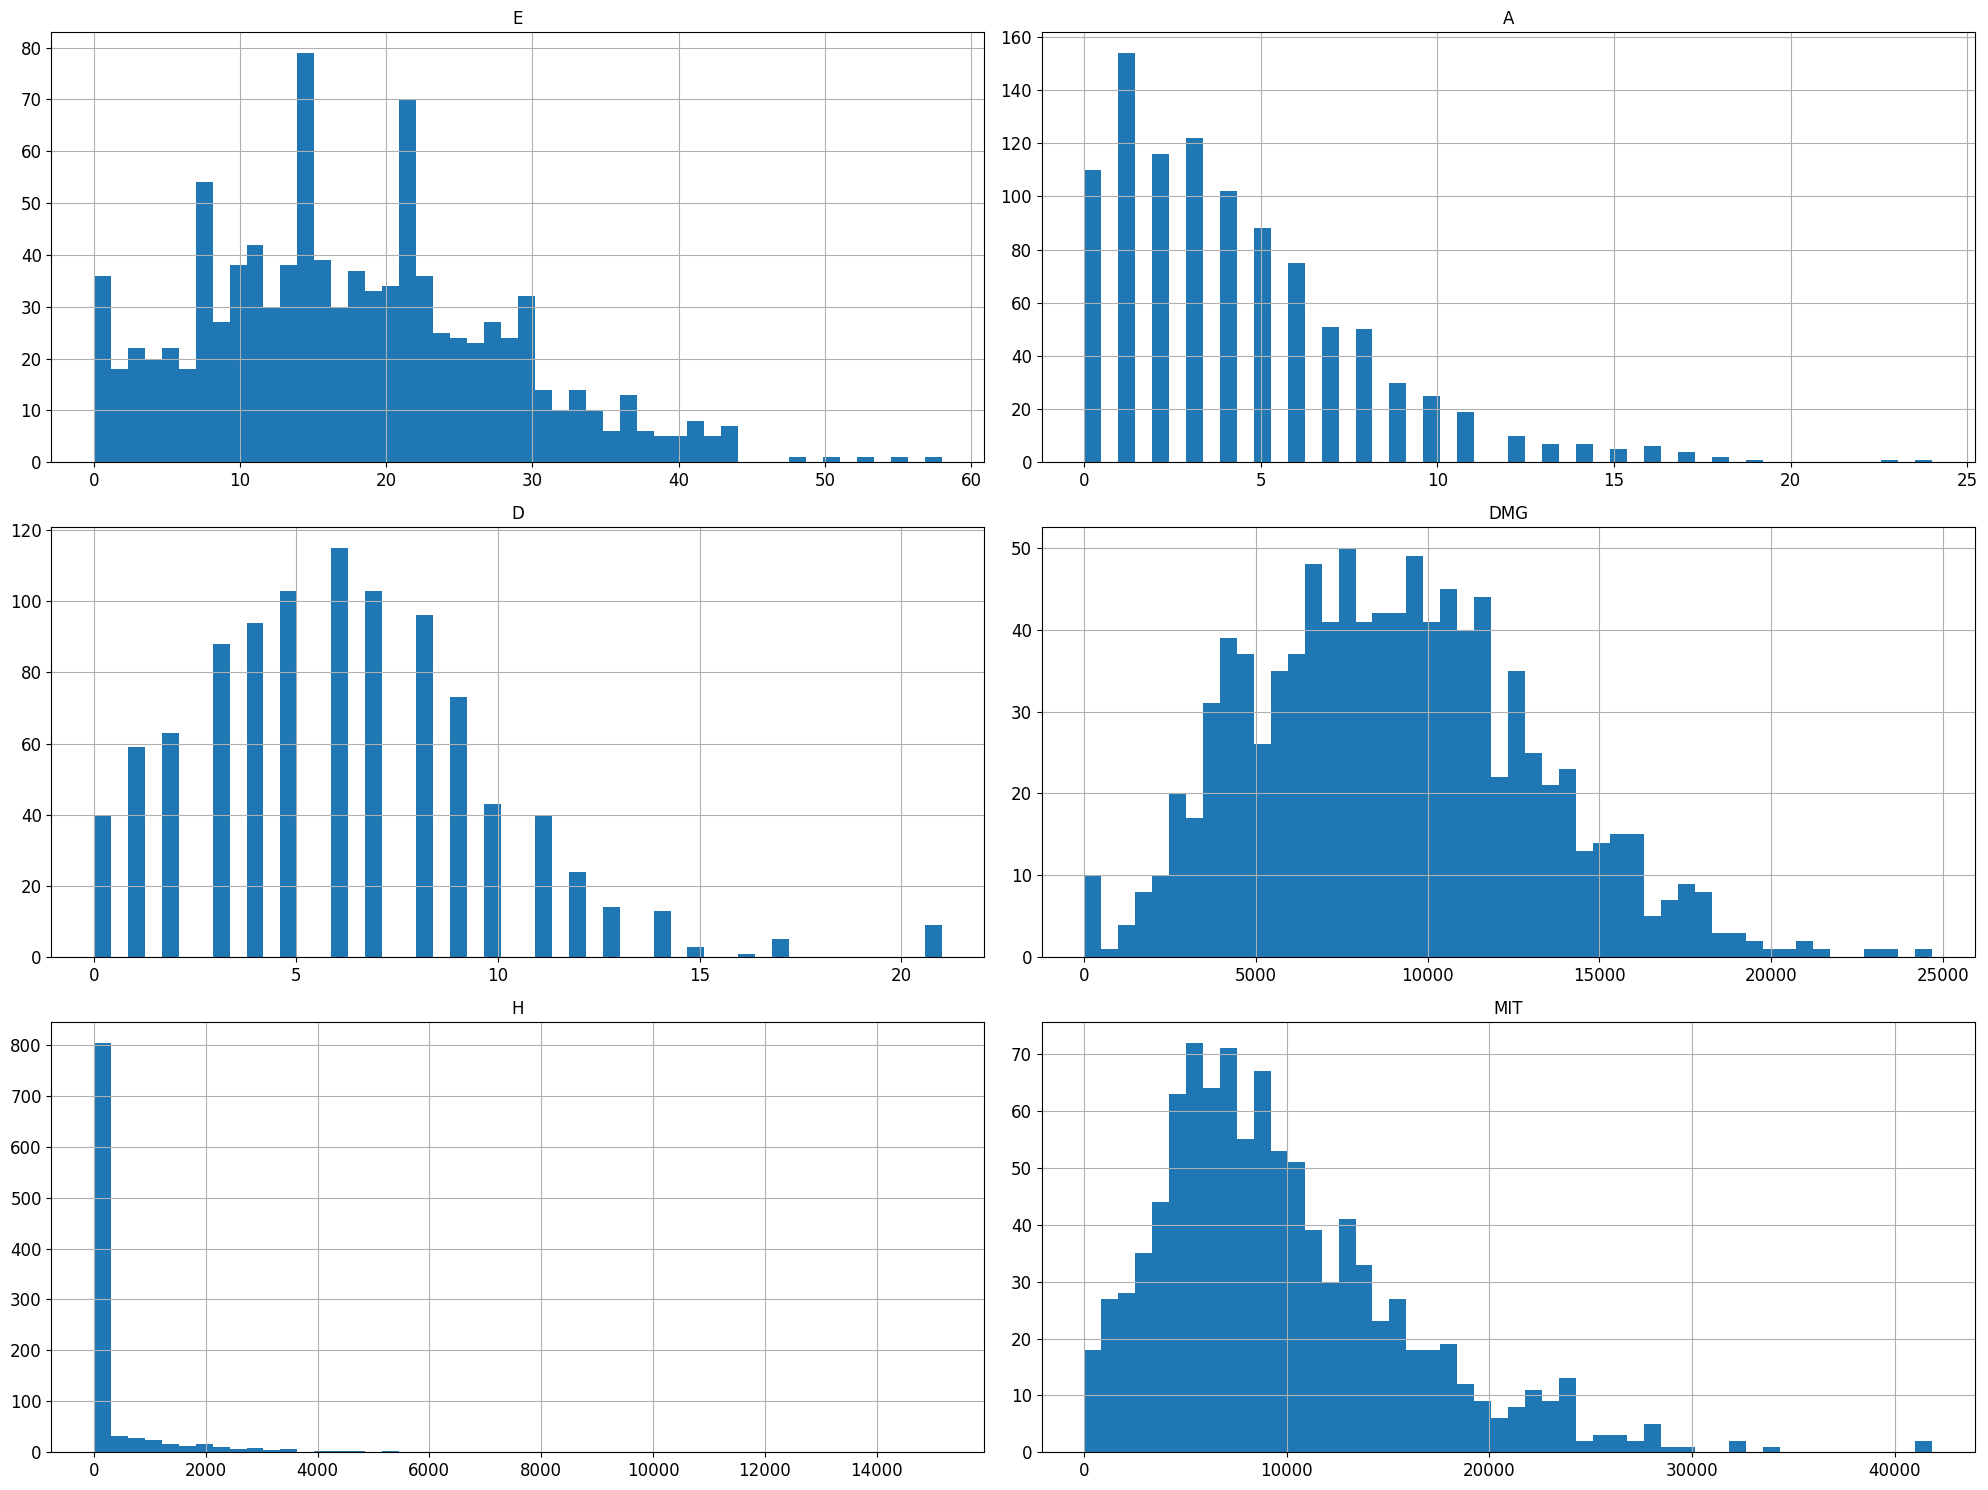

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


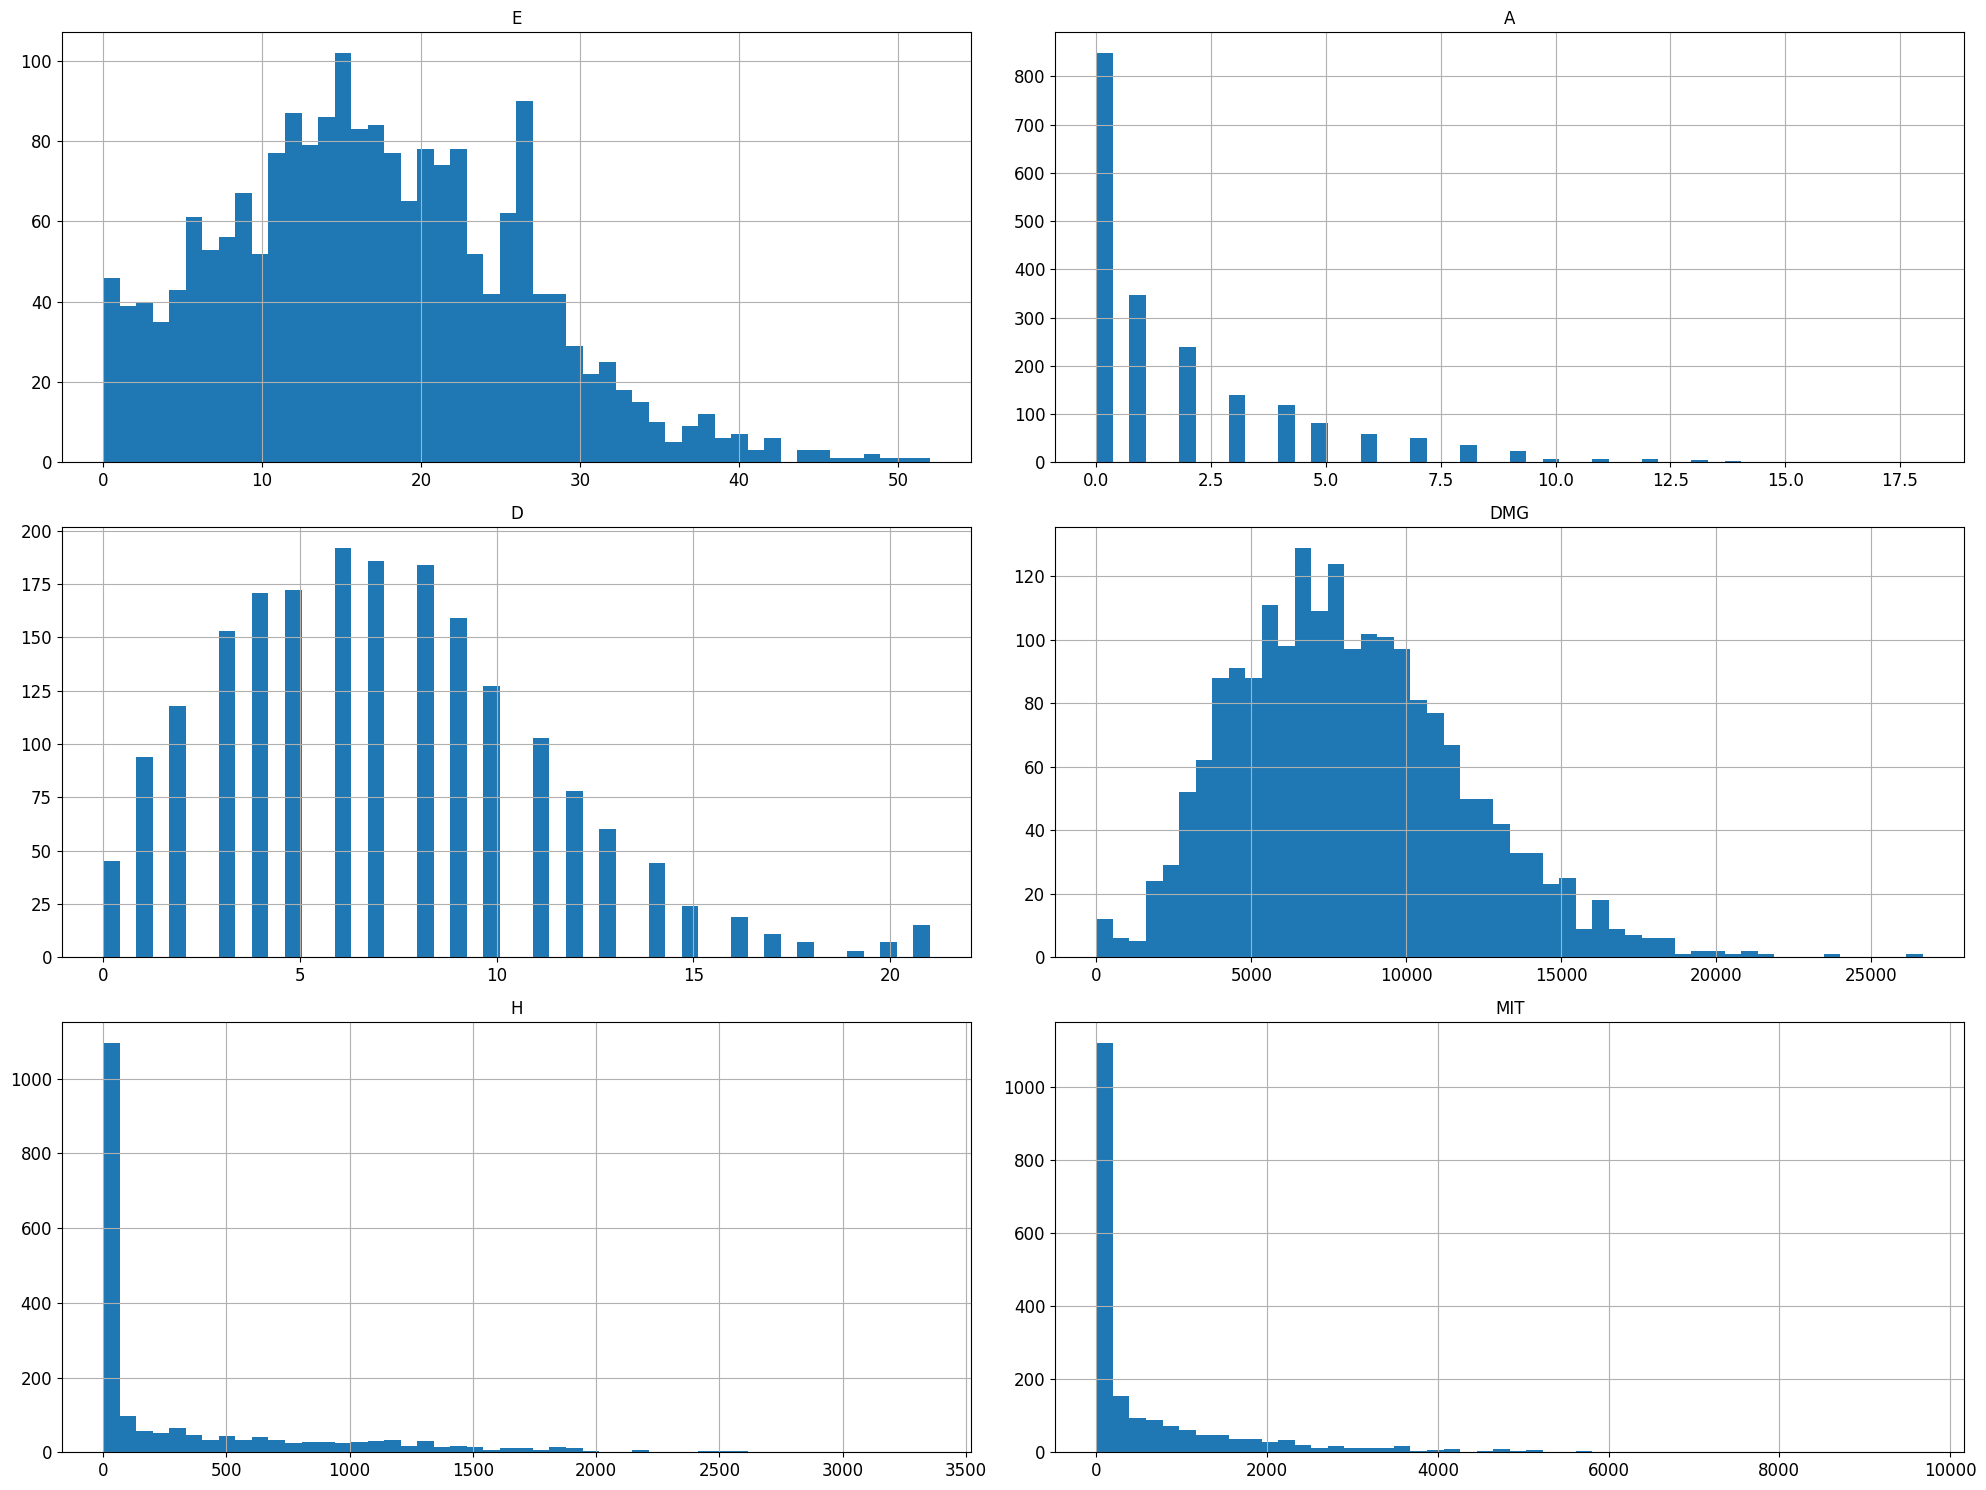

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


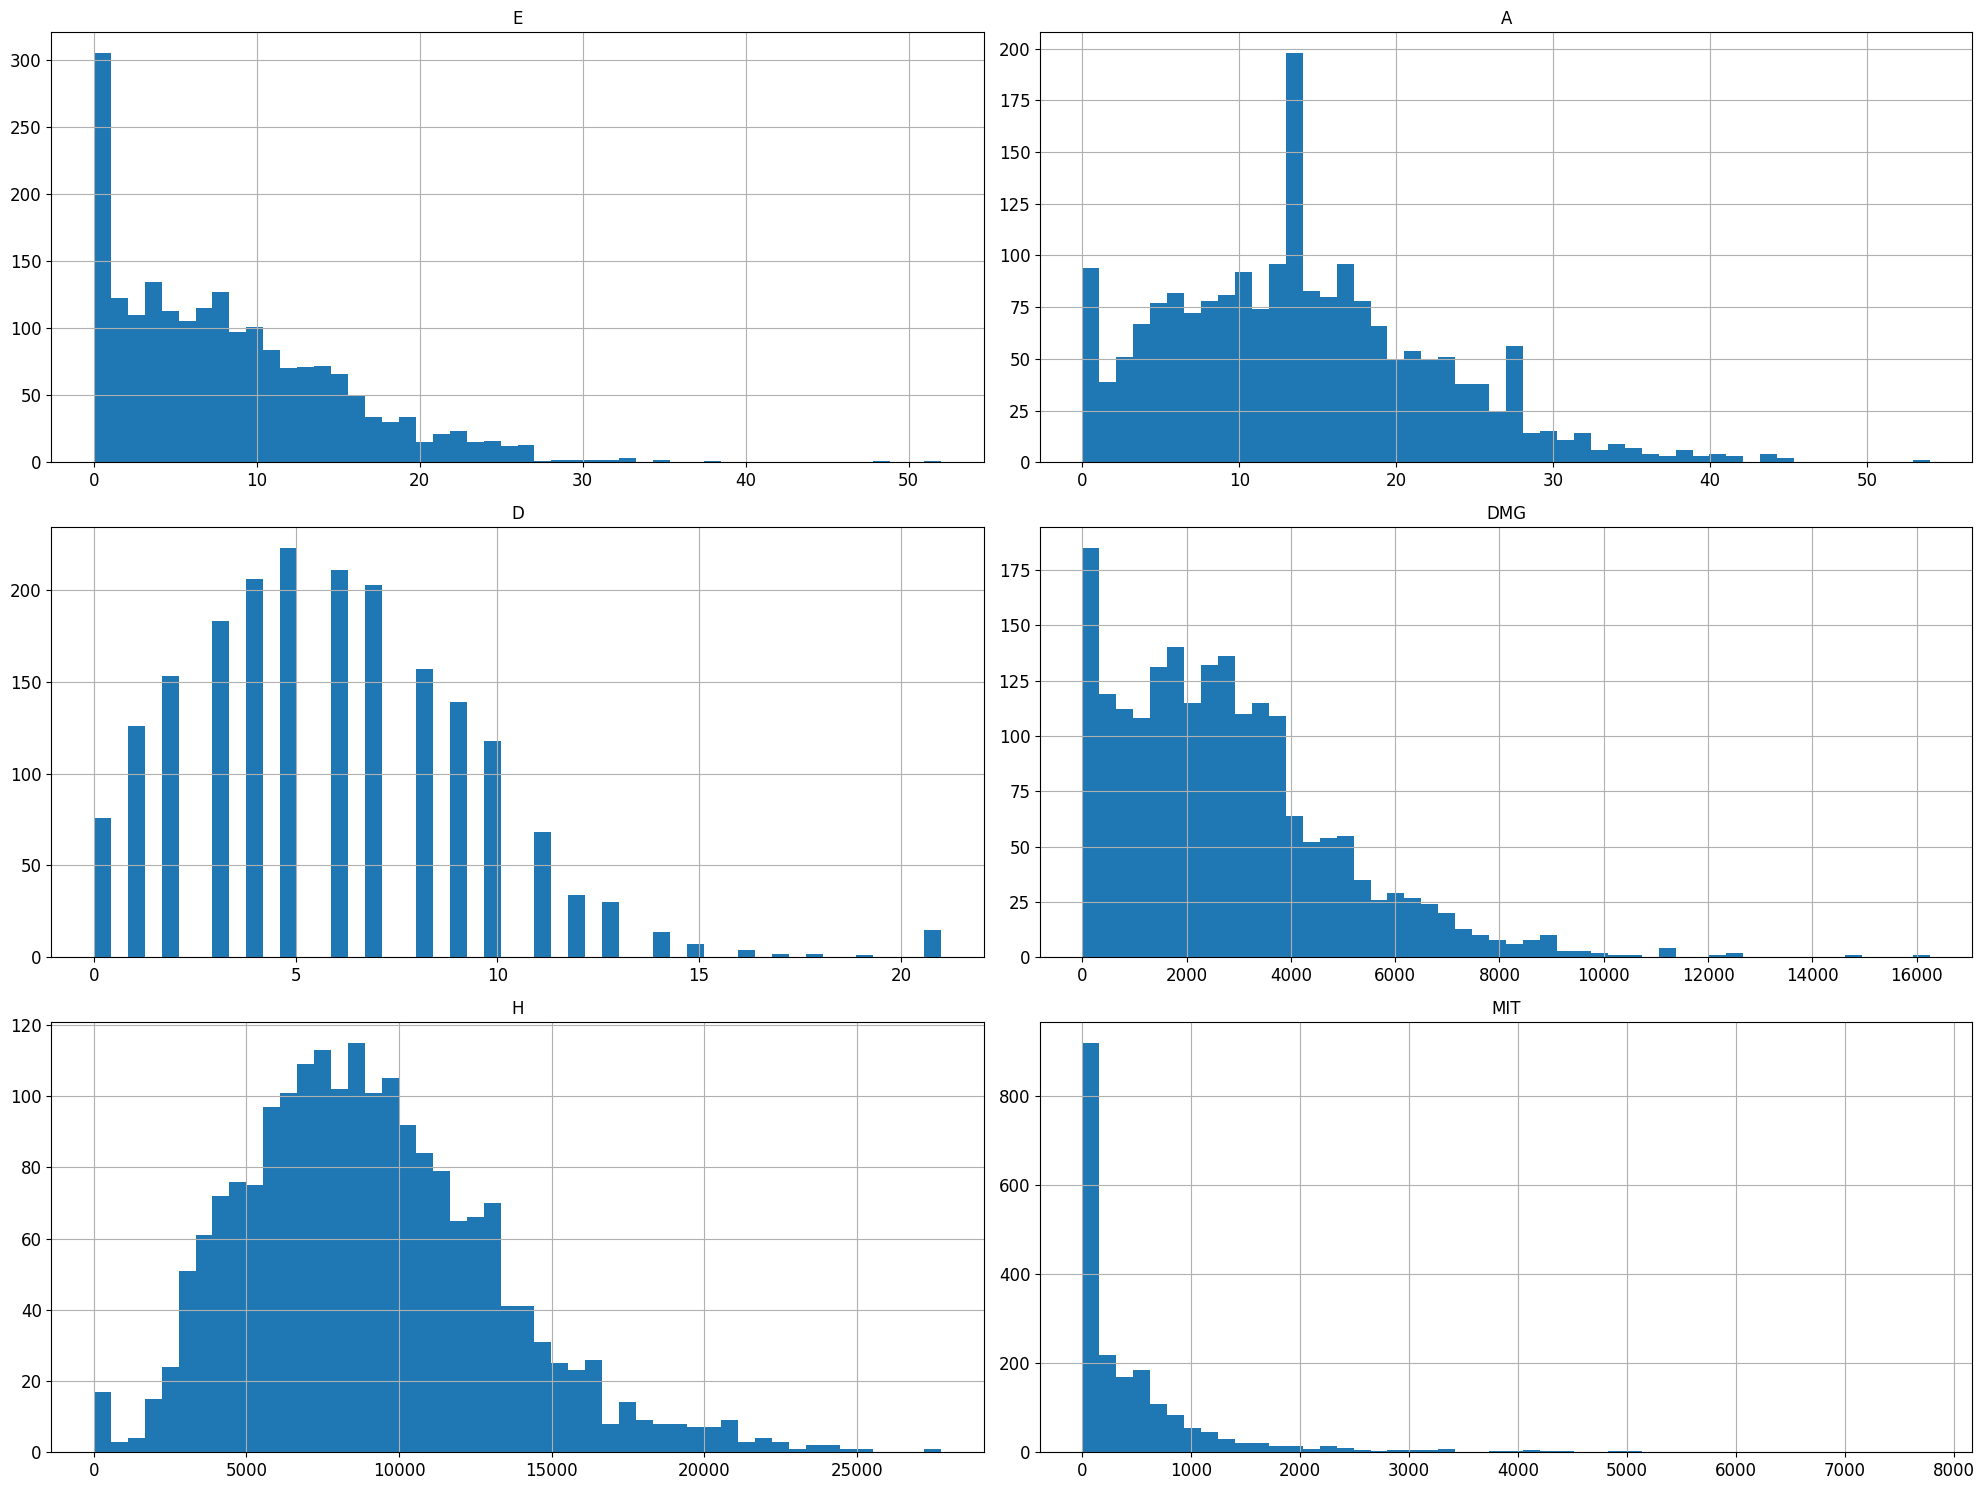

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
159 0  21   3   8  14428    225   9731   DEFEAT
    1  32  12   9  11759     33   4656   DEFEAT
    2  24   6  10  14677    995    354   DEFEAT
    3  20  20   8   7031  13027      0   DEFEAT
    4  16  20  10   4694  10602    512   DEFEAT
...    ..  ..  ..    ...    ...    ...      ...
202 5  41   3   6  19108      0  20700  VICTORY
    6  30   3  14  14148    878     98  VICTORY
    7  40   4  10  15150    619    290  VICTORY
    8  23  32  10   5750  16765    875  VICTORY
    9  25  28   9   6771  11626    347  VICTORY

[4930 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
159 0  0.362069  0.055556  0.380952  0.541064  0.008106  0.232526
    1  0.551724  0.222222  0.428571  0.440974  0.001189  0.111257
    2  0.413793  0.111111  0.476190  0.550401  0.035848  0.008459
    3  0.344828  0.370370  0.380952  0.263669  0.469340  0.000000
    4  0.275862  0.370370  0.476190  0.176029  0.381971  0.012234
...         ...       ...       ...       ...       ...       ...
202 5  0.706897  0.055556  0.285714  0.716568  0.000000  0.494635
    6  0.517241  0.055556  0.666667  0.530563  0.031633  0.002342
    7  0.689655  0.074074  0.476190  0.568139  0.022301  0.006930
    8  0.396552  0.592593  0.476190  0.215630  0.604014  0.020909
    9  0.431034  0.518519  0.428571  0.253919  0.418864  0.008292

[4930 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(493, 60)
(493,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.88888889, 0.91919192, 0.90909091, 0.92857143, 0.90816327])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.52525253, 0.54545455, 0.58585859, 0.55102041, 0.58163265])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.85858586, 0.8989899 , 0.88888889, 0.86734694, 0.86734694])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9107812822098538),
 (NuSVC(), 0.9067614924757782),
 (RidgeClassifierCV(), 0.9047206761492476),
 (NearestCentroid(), 0.9047206761492476),
 (LogisticRegression(n_jobs=-1), 0.9047000618429191),
 (RidgeClassifier(), 0.9027004741290454),
 (SVC(), 0.9027004741290454),
 (ExtraTreesClassifier(n_jobs=-1), 0.8965986394557823),
 (KNeighborsClassifier(n_jobs=-1), 0.8965780251494537),
 (LinearSVC(dual='auto'), 0.8925170068027211),
 (SGDClassifier(n_jobs=-1), 0.8884147598433312),
 (RandomForestClassifier(n_jobs=-1), 0.886415172129458),
 (MLPClassifier(max_iter=3200), 0.8782931354359926),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8762935477221191),
 (HistGradientBoostingClassifier(), 0.8722737579880435),
 (GradientBoostingClassifier(), 0.8721913007627293),
 (AdaBoostClassifier(), 0.8681302824159968),
 (BaggingClassifier(n_jobs=-1), 0.8641929499072356),
 (Perceptron(n_jobs=-1), 0.8520511234796949),
 (DecisionTreeClassifier(), 0.8153164296021439),
 

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)

        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum(), importances_support.sum()),
                    ('돌격(2)', '공격(4)', '지원(4)')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.3f}')

        print('\n**돌격(2) 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**공격(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_damage, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**지원(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_support, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 0.299
죽음: 0.280
도움: 0.194
피해: 0.095
경감: 0.068
치유: 0.064

**역할 중요도**
지원(4): 0.381
공격(4): 0.357
돌격(2): 0.262

**돌격(2) 특성 중요도**
처치: 0.089
죽음: 0.087
도움: 0.040
피해: 0.022
경감: 0.015
치유: 0.008

**공격(4) 특성 중요도**
처치: 0.138
죽음: 0.090
피해: 0.043
도움: 0.037
경감: 0.025
치유: 0.024

**지원(4) 특성 중요도**
도움: 0.116
죽음: 0.103
처치: 0.071
치유: 0.032
피해: 0.030
경감: 0.028


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

DEFEAT (227)
       E   A  D   DMG      H    MIT     GAME
2260  19   5  7  7284      0   4911   DEFEAT
2261  16   2  5  6361     86   1977   DEFEAT
2262  13   0  6  8194      0     78   DEFEAT
2263   6  12  6  3406   6389      0   DEFEAT
2264   5  10  5  3127   4954    244   DEFEAT
2265  16   5  3  8092      0  13960  VICTORY
2266  11   3  5  4746      0      0  VICTORY
2267  20   0  7  7146      0    790  VICTORY
2268   3  12  6   875   7886    309  VICTORY
2269   0  20  4    40  12448      0  VICTORY
TEAM 1: 0.9 1.1 1.0 1.0 0.9
TEAM 2: 1.1 0.9 1.1 0.9 1.2

DEFEAT (226)
       E  A   D   DMG      H    MIT     GAME
2250  15  0   8  9830      0  23263   DEFEAT
2251   9  1  16  8536    157    164   DEFEAT
2252  14  0  12  9024    995      0   DEFEAT
2253  12  6  13  6418   7434    304   DEFEAT
2254   7  5  10  2490   8386    764   DEFEAT
2255  18  7   4  6021   2513   7530  VICTORY
2256  31  3   7  9965    368    591  VICTORY
2257  29  8   8  9222      0    766  VICTORY
2258  25  9   3  

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

VICTORY (266)
       E   A   D   DMG     H    MIT     GAME
2650  28   6   2  7548     0  10490  VICTORY
2651  23   6   4  5694     0      0  VICTORY
2652  27   0   2  8178   726      0  VICTORY
2653   7  21   1  1355  6997    206  VICTORY
2654  23  10   3  4439  4545      0  VICTORY
2655   6   1   9  4720   505   4838   DEFEAT
2656   5   0  15  3363   812      0   DEFEAT
2657   5   0   9  5189     0    134   DEFEAT
2658   3   2   5  2798  6136    434   DEFEAT
2659   2   4   9  1873  4386      0   DEFEAT
TEAM 1: 1.4 1.4 1.5 1.3 1.2
TEAM 2: 0.6 0.4 0.7 0.8 0.6

VICTORY (265)
       E   A  D   DMG     H   MIT     GAME
2640  15   6  0  4877     0  4785  VICTORY
2641  18   3  0  6135    53  2171  VICTORY
2642  13   1  5  5097   862     0  VICTORY
2643  16  13  1  3569  5661     0  VICTORY
2644   6  16  1  1671  7263   275  VICTORY
2645   4   1  6  5299     0  7459   DEFEAT
2646   4   0  7  3028    62   297   DEFEAT
2647   3   1  5  5457     0     0   DEFEAT
2648   1   4  5   492  7052    28

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-12-07 07:54:33.790959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 07:54:35.704007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 07:54:35.731245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 07:54:35.731492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-12-07 07:54:36.776849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-07 07:54:36.798596: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efc90bfc810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-07 07:54:36.798638: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-12-07 07:54:36.855391: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-07 07:54:36.865971: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-07 07:54:36.909090: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 1s 16ms/step - loss: 0.6842 - accuracy: 0.5691 - val_loss: 0.6777 - val_accuracy: 0.5806
Epoch 2/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.5962 - val_loss: 0.6690 - val_accuracy: 0.6048
Epoch 3/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.6341 - val_loss: 0.6613 - val_accuracy: 0.6371
Epoch 4/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6558 - val_loss: 0.6542 - val_accuracy: 0.7258
Epoch 5/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6537 - accuracy: 0.6965 - val_loss: 0.6469 - val_accuracy: 0.7500
Epoch 6/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.7182 - val_loss: 0.6404 - val_accuracy: 0.7581
Epoch 7/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.7453 - val_loss: 0.6343 - val_accuracy: 0.7984
Epoch 8/256
12/12 [=====

(0.2514614164829254, 0.9274193644523621)